# CSC12110 - Applied Data Analytics

Ho Chi Minh City University of Science - VNUHCM

-   **Class**: 21HTTT - November 2024
-   **Instructors:** Ph.D. Vu Thi My Hang, MSc. Ho Thi Hoang Vy
-   **Group:** 7

|    ID    | Name               | Tasks       | Contrib. (%) |
| :------: | :----------------- | :---------- | :----------: |
| 21127004 | Tran N. An Phong   | Test 111111 |     100      |
| 21127135 | Diep Huu Phuc      | Test 22222  |     100      |
| 21127428 | Pham N. Quoc Thanh | Test 3333   |     100      |

## Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Inspect data

In [6]:
df_ads = pd.read_csv('2425_QC.csv')
df_ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


In [10]:
df_ads.info()
df_ads.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1002.000000,1001.000000,1002.000000,1002.000000,1002.000000,1002.00000
mean,64.988303,36.024975,55001.837565,180.031637,0.481038,0.50000
std,15.870862,8.785692,13401.410392,43.893820,0.499890,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.320000,29.000000,47073.067500,138.905000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.562500,42.000000,65451.787500,218.797500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [18]:
print("-- Missing values in each column:")
print(df_ads.isnull().sum())
print("\n-- Number of duplicate rows: ", df_ads.duplicated().sum())

-- Missing values in each column:
Daily Time Spent on Site    0
Age                         1
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

-- Number of duplicate rows:  2


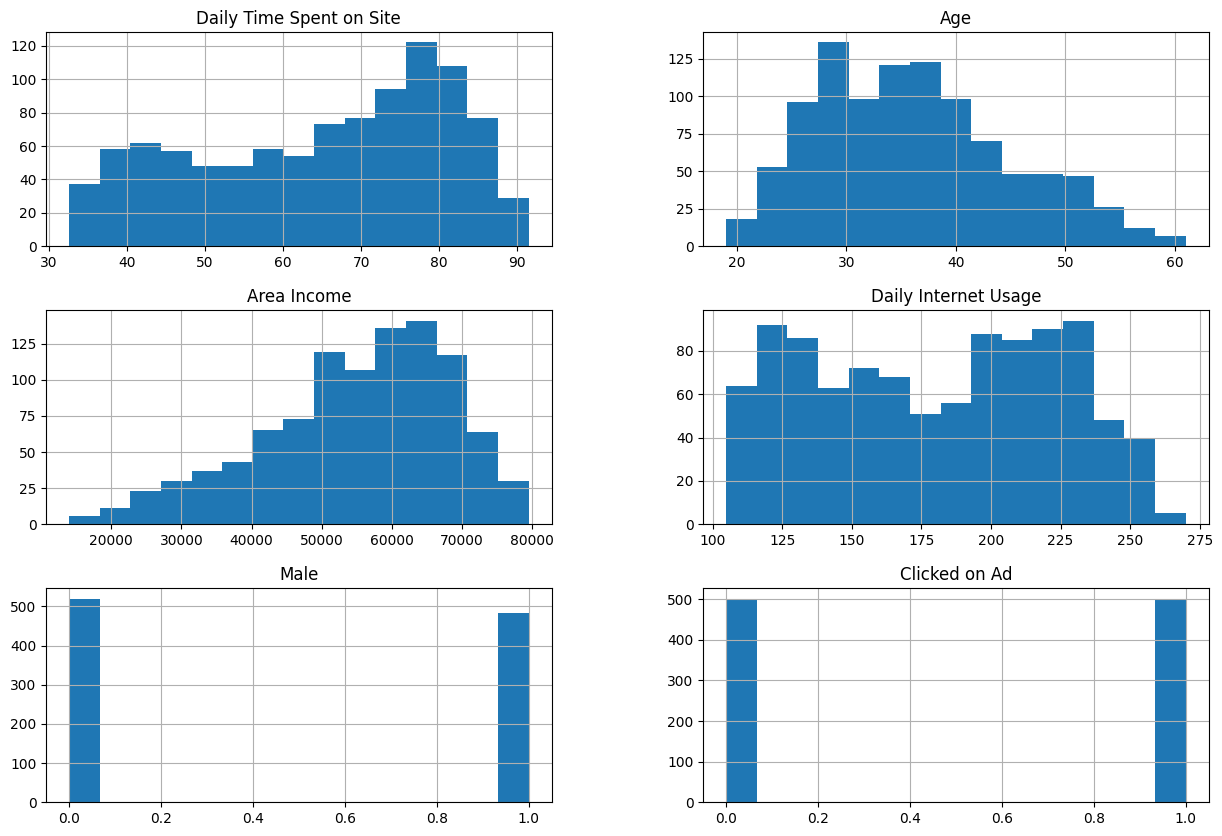

In [26]:
df_ads.hist(bins=15, figsize=(15, 10))
plt.show()

1. **Daily Time Spent on Site:** The distribution skews slightly to the right. Most users spend roughly 70 to 80 minutes daily, with fewer spending less than 40 or more than 90 minutes.

1. **Age**: This distribution appears quite normal, centered around younger adults of 30 year old, with not many people below 20 or above 50.

1. **Area Income:** There is a peak near 60000, indicating a rather well-off user base, although a few low and high outliers do exist.

1. **Daily Internet Usage:** With no obvious peak, the distribution seems fairly uniform, ranging between 100 to 250 minutes, implying users spend varying amounts of time online daily.

1. **Male:** This variable is binary and shows that there are slightly more female users.

1. **Clicked on Ad:** This is also a binary feature and suggests an even distribution between the people clicking and those who did not.

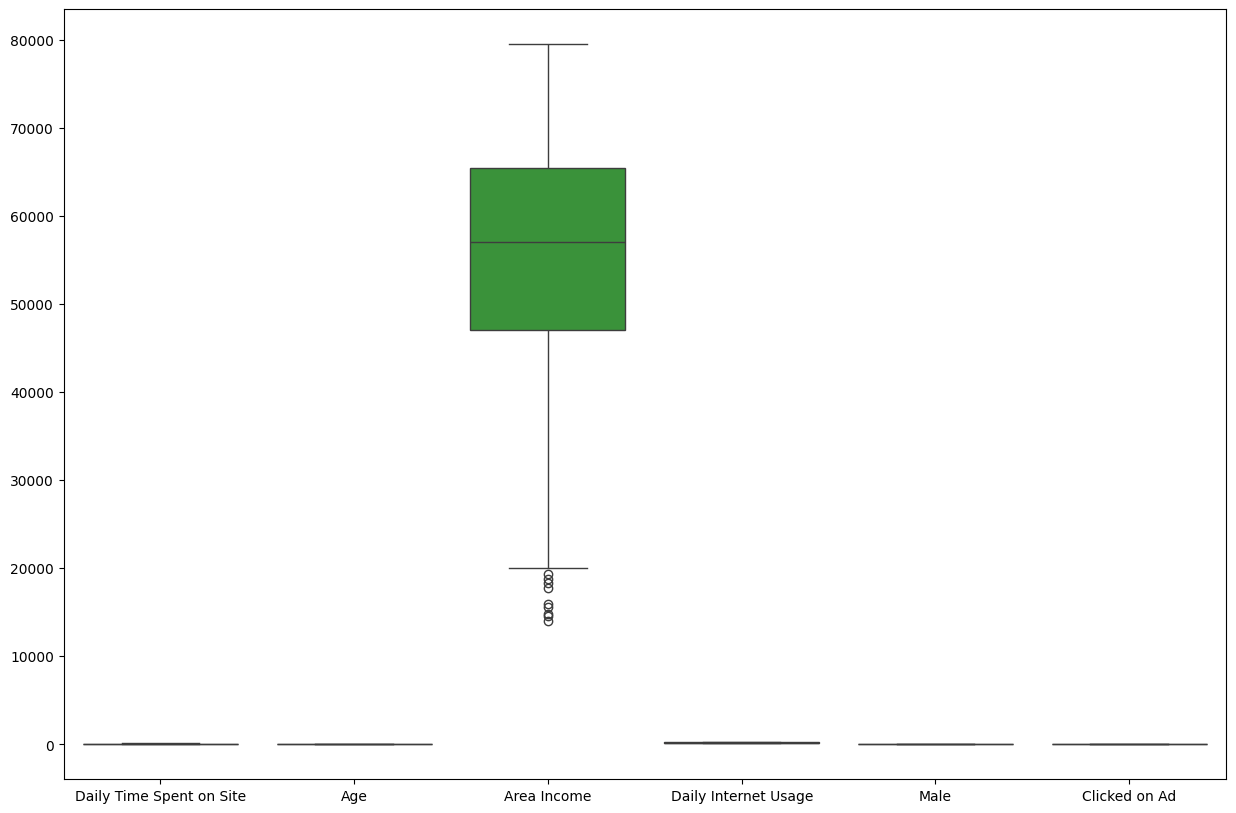

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_ads)
plt.show()